# Визуализация с seaborn

## Домашнее задание

### Цель домашнего задания

Отработать навык визуализации и форматирования данных с помощью seaborn. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков.

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

У всех графиков обязательно должен присутствовать заголовок и подписи осей, добавленные через объект класса Axes (кроме pairplot и FacetGrid, в этих графиках допустимо использовать стандартные подписи, генерируемые seaborn). Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` — порядковый номер записи в датасете.
* `Name` — наименование игры.
* `Platform` — платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и другие).
* `Year` — год выпуска игры.
* `Genre` — жанр игры.
* `Publisher` — наименование компании-издателя игры.
* `NA_Sales` — объём продаж игры в Северной Америке, млн копий.
* `EU_Sales` — объём продаж игры в Европе, млн копий.
* `JP_Sales` — объём продаж игры в Японии, млн копий.
* `Other_Sales` — объём продаж игры в остальных странах, млн копий.
* `Global_Sales` — объём продаж игры по всему миру, млн копий.

### Критерии оценки

**Зачёт** — выполнены задачи 1-7, каждый график отформатирован и читаем.

**На доработку** — выполнены не все обязательные задачи или какой-то из графиков не читаем/не подписан.

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.
* Если при попытке построить гистограмму вы получаете ошибку `module 'seaborn' has no attribute 'histplot'` — у вас установлена устаревшая версия библиотеки seaborn. Обновить её можно с помощью команды:
** `!pip install seaborn --upgrade` в ячейке ноутбука
** `pip install seaborn --upgrade` в терминале Jupyter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объёма продаж всех игр жанра «Sports» в Японии. Задайте графику размер 12 на 6.

Text(0, 0.5, 'Величина продаж')

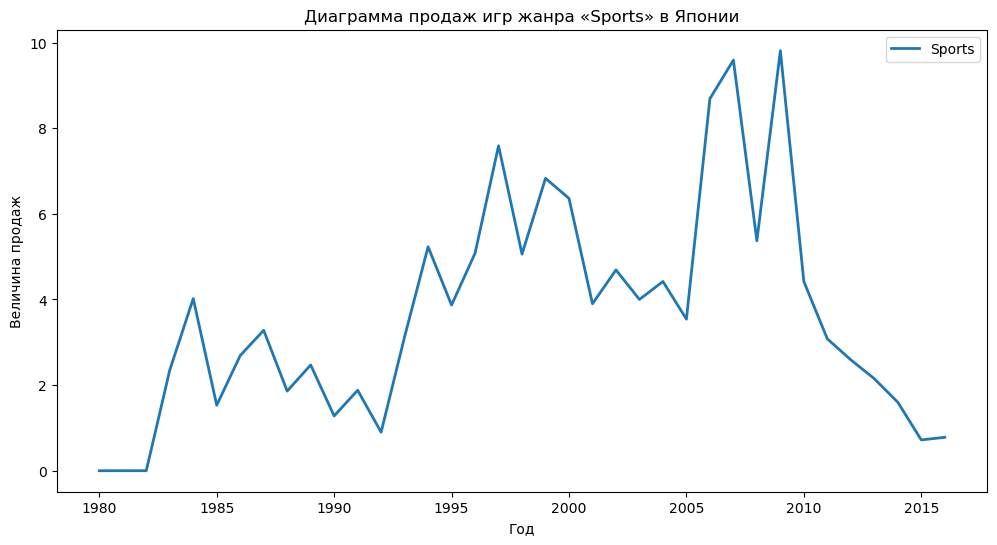

In [13]:
#строим серию с цепочкой: выборкой по жанру "Sports", группировкой по годам и сумме продаж в Японии,
#сортирировкой по годам (по возрастанию)
df_Sports = (df[df['Genre'] == 'Sports'].groupby('Year')['JP_Sales'].sum().sort_index())
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=df_Sports.index, y=df_Sports.values, ax=ax, label='Sports', linewidth=2)
ax.set_title('Диаграмма продаж игр жанра «Sports» в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Величина продаж')

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

Text(0, 0.5, 'Величина продаж')

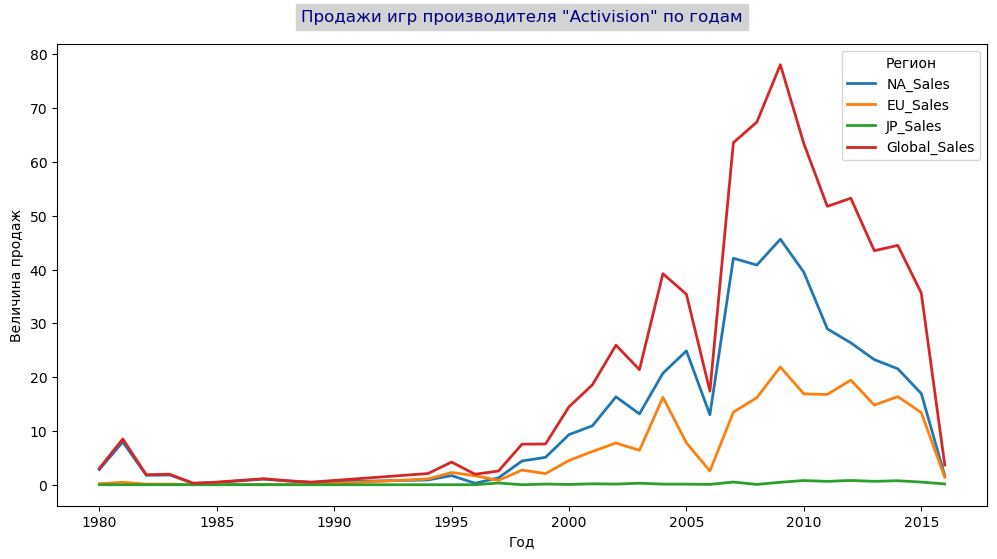

In [20]:
#строим серию с цепочкой: выборкой по производителю "Activision", группировкой по годам и сумме продаж в разных регионах,
#сортирировкой по годам (по возрастанию)
df_Activision = (df[df['Publisher'] == 'Activision'].groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].sum().sort_index().reset_index())

#распаковываем данные в длинный формат и записываем в dataframe
df_melted = df_Activision.melt(id_vars='Year', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'], var_name='Регион', value_name='Продажи')

#создаем экземпляры и вызываем метод Lineplot
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df_melted, x='Year', y='Продажи', hue='Регион', ax=ax, linewidth=2)
ax.set_title('Продажи игр производителя "Activision" по годам', pad = 16, color = 'navy', backgroundcolor = 'lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Величина продаж')



In [19]:
df_melted


,Year,Регион,Продажи
0,1980.0,NA_Sales,2.82
1,1981.0,NA_Sales,7.95
2,1982.0,NA_Sales,1.75
3,1983.0,NA_Sales,1.81
4,1984.0,NA_Sales,0.26
...,...,...,...
123,2012.0,Global_Sales,53.25
124,2013.0,Global_Sales,43.49
125,2014.0,Global_Sales,44.48
126,2015.0,Global_Sales,35.63


### Комментарий для преподавателя:

В этом задании допустимо вместо прохода циклом использовать `pd.melt()`

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

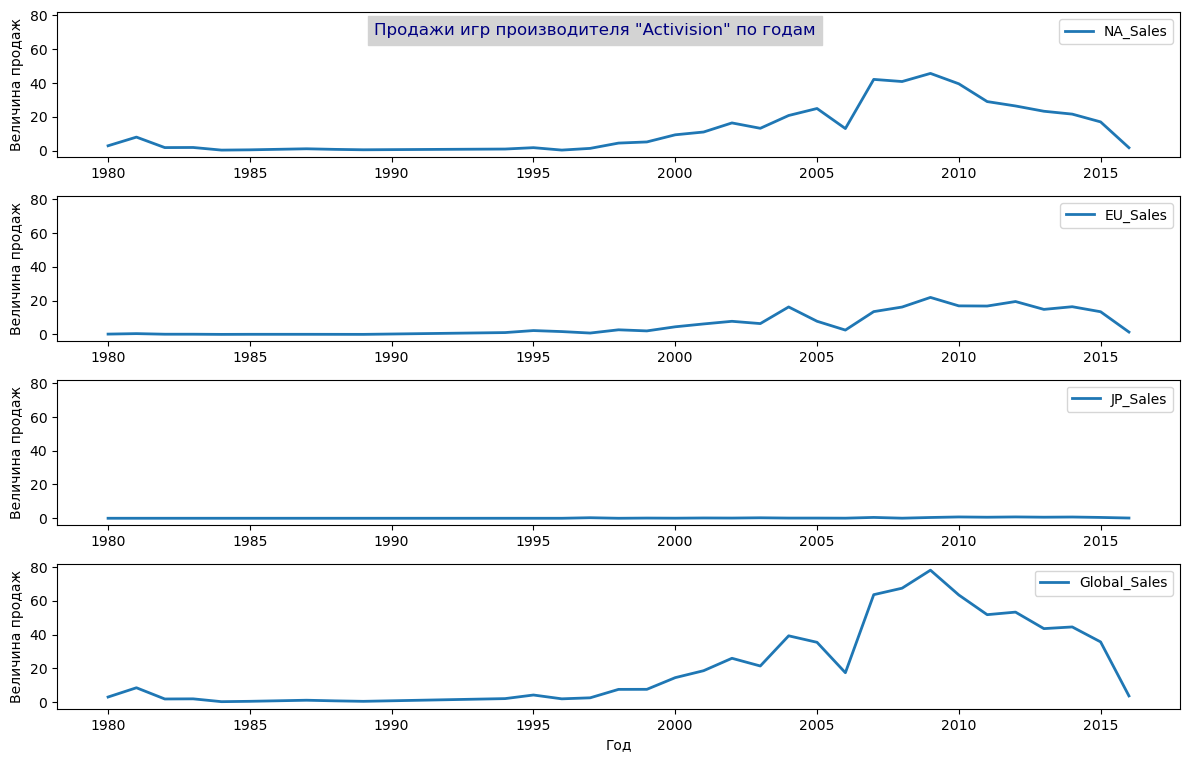

In [28]:
#создаем объекты для построения графика, задаем атрибуты
fig, axs = plt.subplots(nrows = 4, sharey = True, figsize=(12, 8))
list_series = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

#наносим значеиня каждой серии с помощтю метода plot объекта класса axs
for i, column in enumerate(list_series):
    #добавляем серию в цикл, перебираем по значениям листа list_series
    df_Activision = (df[df['Publisher'] == 'Activision'].groupby('Year')[column].sum().sort_index())    
    ax = axs[i]
    sns.lineplot(x=df_Activision.index, y=df_Activision.values, ax=axs[i], label=column, linewidth=2)

    #добавляем методы объектов для подписи графиков
    ax.set_ylabel('Величина продаж')
    if i < len(list_series) - 1:
        ax.set_xlabel('')
    if i == len(list_series) - 1:
        ax.set_xlabel('Год') #Только на последнем графике подпись оси X
    
fig.suptitle('Продажи игр производителя "Activision" по годам', color='navy', backgroundcolor='lightgray', y=0.93)     
plt.tight_layout()
plt.show()


### Задача 4

Постройте PairPlot для всех численных признаков датасета. Разным цветом укажите цвета для разных платформ.

Примечание: при построении этого графика pandas может выдавать предупреждения (warnings), в этой задаче такое поведение допустимо.

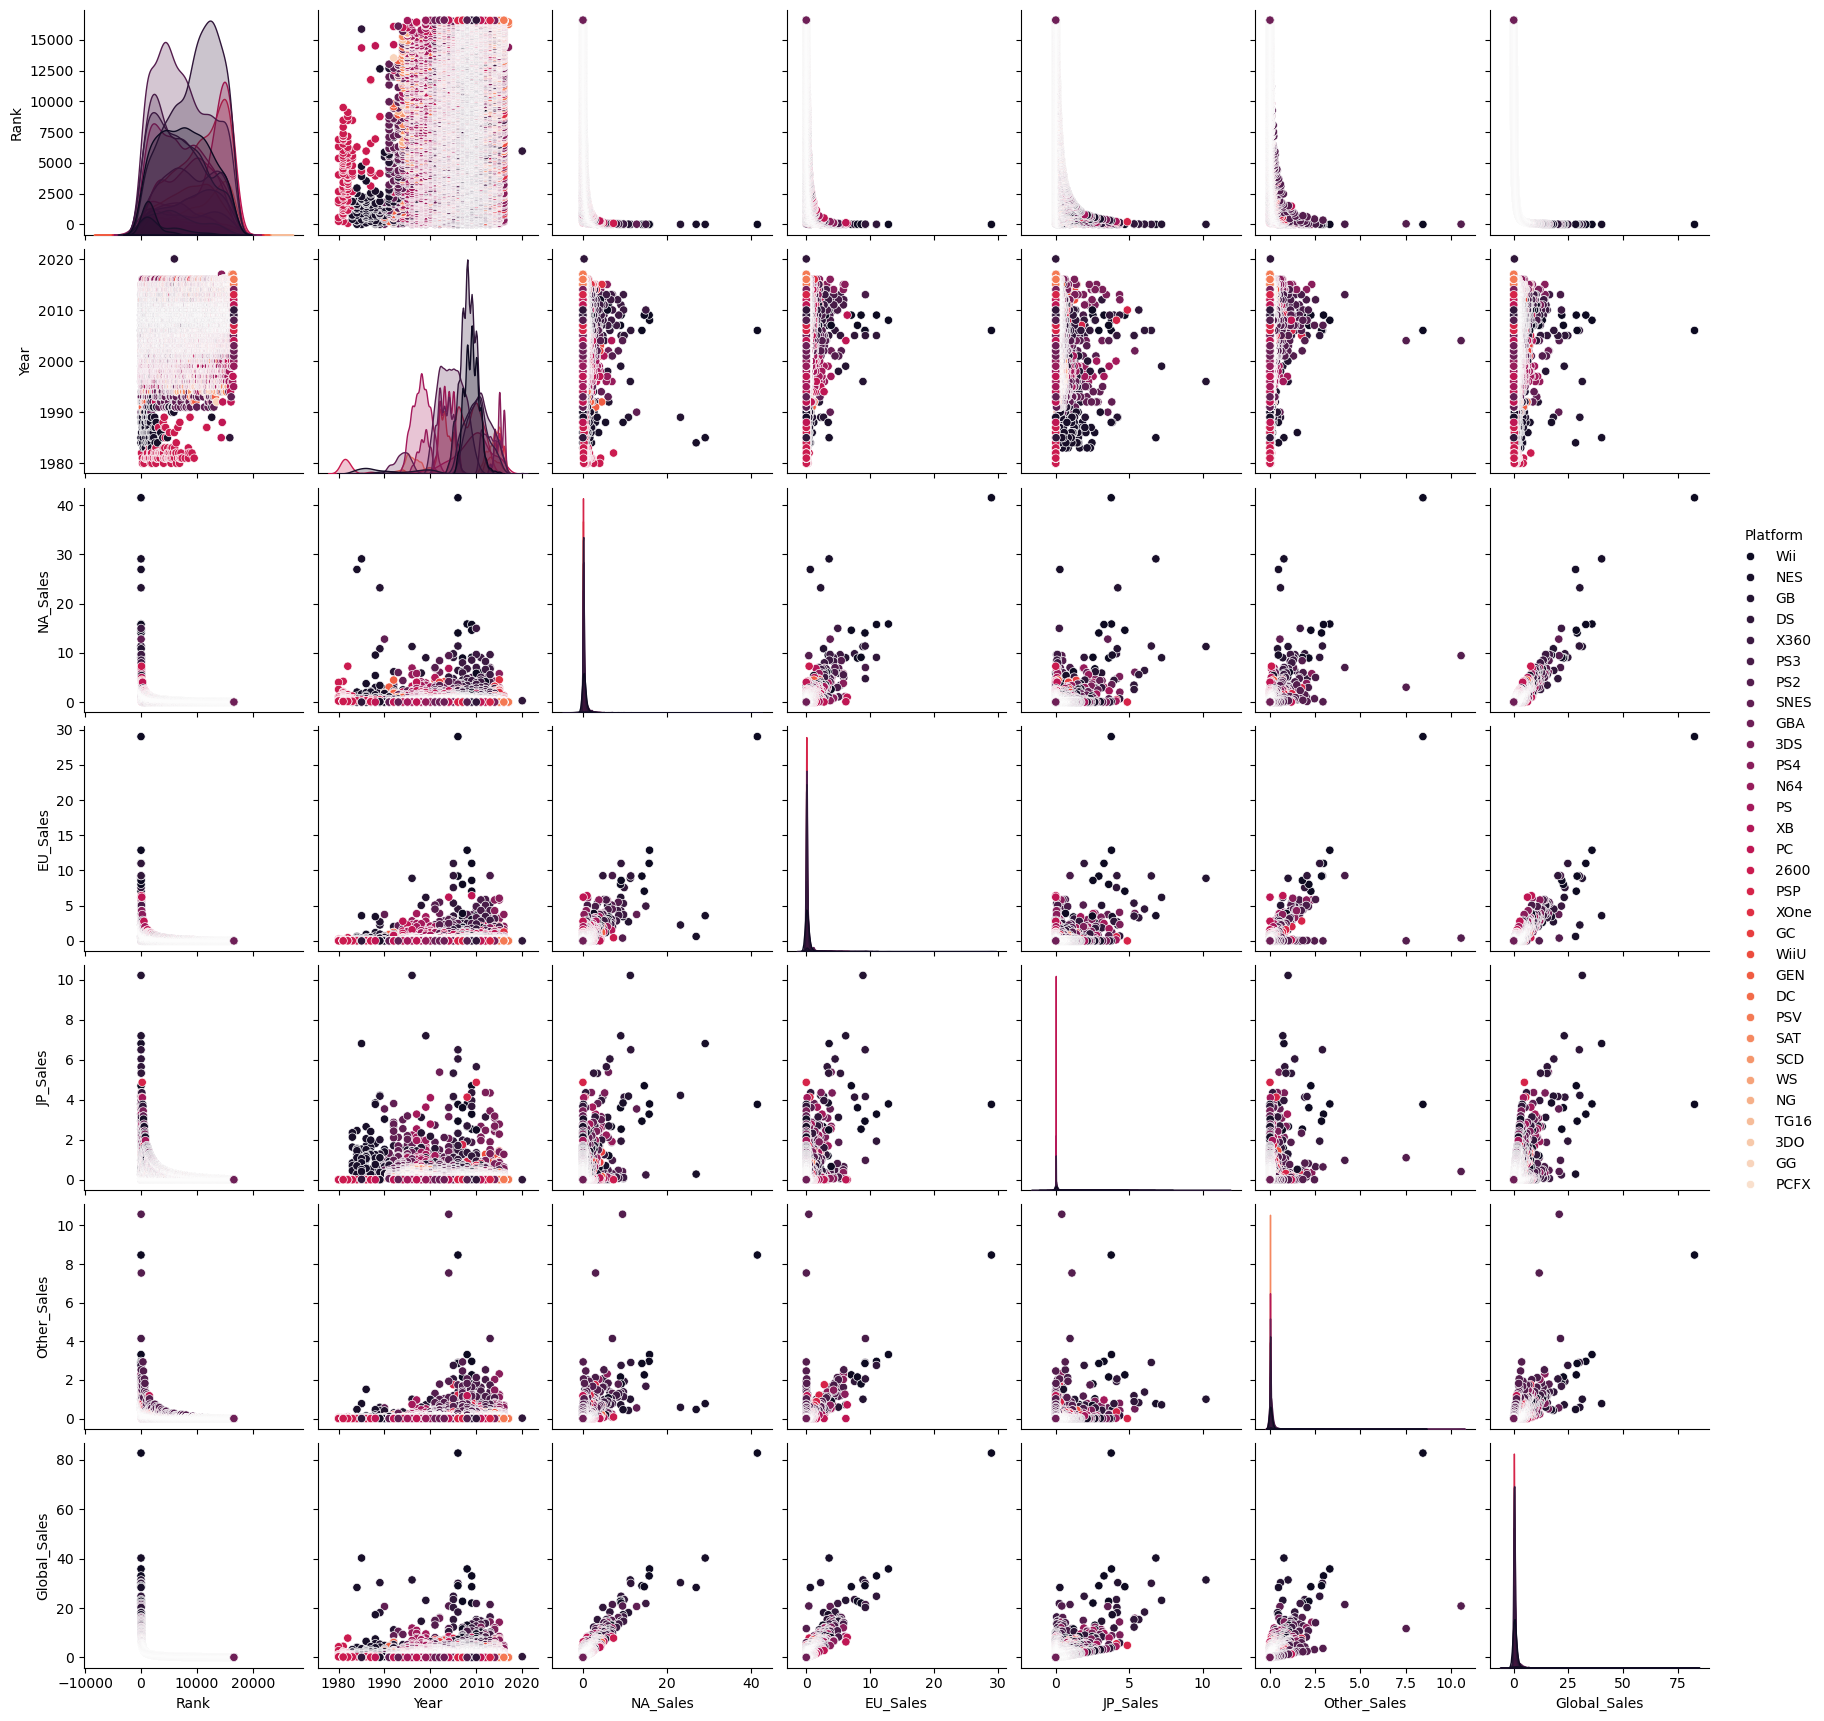

In [29]:
sns.pairplot(df, hue = 'Platform',palette = 'rocket')

### Задача 5

В одной координатной сетке постройте 2 гистограммы распредения мировых продаж игр издателей «Microsoft Game Studios» и «Take-Two Interactive» после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков.

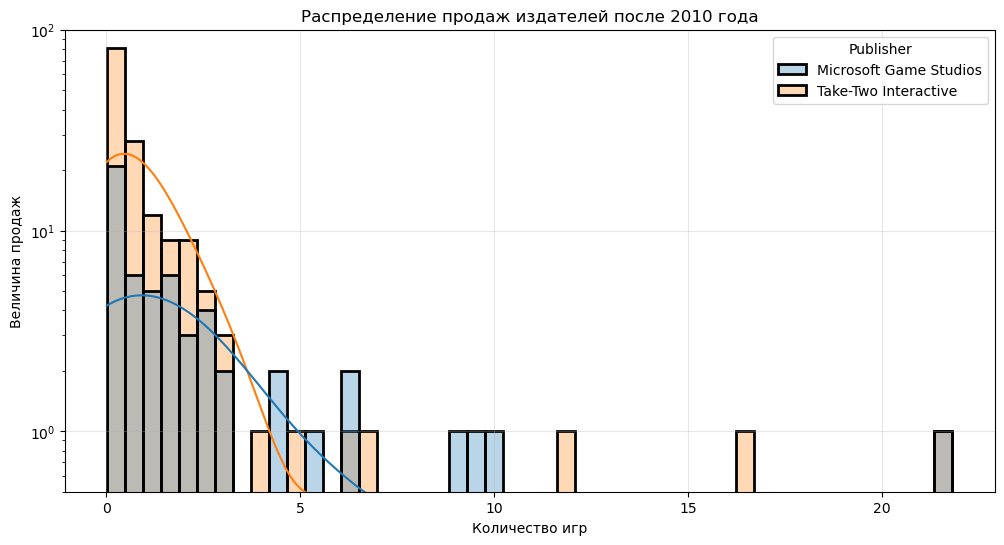

In [70]:
#фильтруем данные: после 2010 года, для двух производителей, берем только столбец с продажами для гистограммы
data5 = df[(df['Year'] >= 2010) & (df['Publisher'].isin(['Microsoft Game Studios', 'Take-Two Interactive']))]
plt.figure(figsize=(12, 6))

ax = sns.histplot(data = data5, x = 'Global_Sales', hue = 'Publisher', kde=True, alpha = 0.3, linewidth=2, edgecolor='black')

ax.set_title('Распределение продаж издателей после 2010 года')
ax.set_xlabel('Количество игр')
ax.set_ylabel('Величина продаж')

#шкалу Y логарифмируем для читаемости
ax.set_yscale('log')
ax.set_ylim(0.5, 100)
ax.grid(True, alpha=0.3)

### Задача 6

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зелёного полупрозрачного прямоугольника.

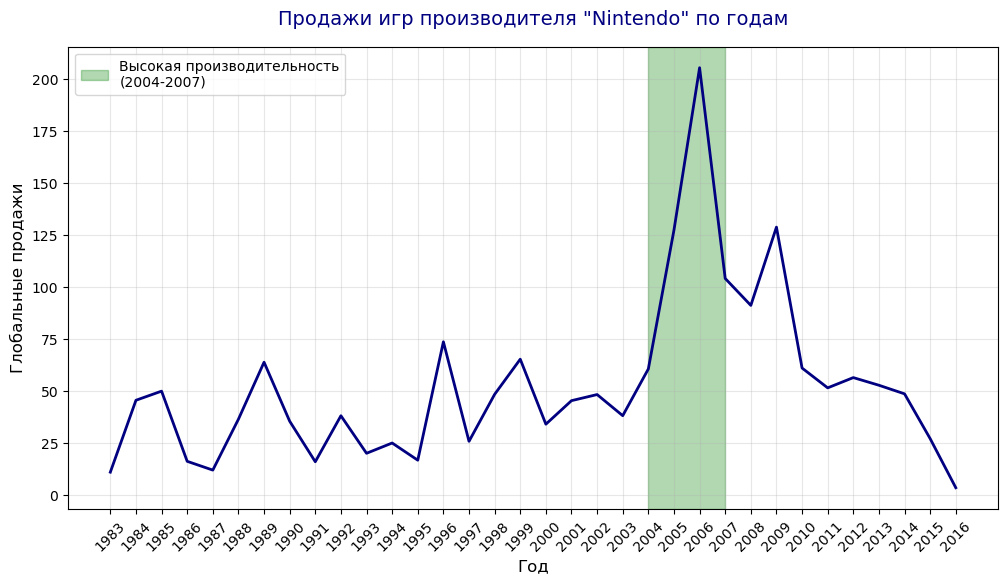

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))

#готовим серию
sales_data = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Global_Sales'].sum()

#строим график продаж
sns.lineplot(x=sales_data.index, y=sales_data.values, ax=ax, linewidth=2, color='navy')

#подсветка периода высокой производительности
if not high_production_years.empty: ax.axvspan(start_year, end_year, alpha=0.3, color='green',label=f'Высокая производительность\n({int(start_year)}-{int(end_year)})')

#настройки графика
ax.set_title('Продажи игр производителя "Nintendo" по годам', pad=16, color='navy', fontsize=14)
ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Глобальные продажи', fontsize=12)
ax.grid(True, alpha=0.3)

#настраиваем ось X
ax.set_xticks(range(int(sales_data.index.min()), int(sales_data.index.max()) + 1, 1))
ax.tick_params(axis='x', rotation=45)

#добавляем легенду
ax.legend()

In [77]:
sales_data

Year
1983.0     10.96
1984.0     45.56
1985.0     49.95
1986.0     16.18
1987.0     11.95
1988.0     36.44
1989.0     63.88
1990.0     35.49
1991.0     15.97
1992.0     38.11
1993.0     20.04
1994.0     24.99
1995.0     16.72
1996.0     73.70
1997.0     25.80
1998.0     48.41
1999.0     65.33
2000.0     34.05
2001.0     45.37
2002.0     48.31
2003.0     38.14
2004.0     60.65
2005.0    127.47
2006.0    205.61
2007.0    104.18
2008.0     91.22
2009.0    128.89
2010.0     61.07
2011.0     51.53
2012.0     56.47
2013.0     52.79
2014.0     48.65
2015.0     27.08
2016.0      3.47
Name: Global_Sales, dtype: float64

### Задача 7

Определите 3 жанра и 4 платформы с самыми большими продажами игр в мире за всё время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанра, платформы). Разными цветами укажите игры разных годов. Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны.

Делайте графики достаточно читаемыми, чтобы из них можно было сделать вывод о наличии / отсутствии зависимостей в данных.

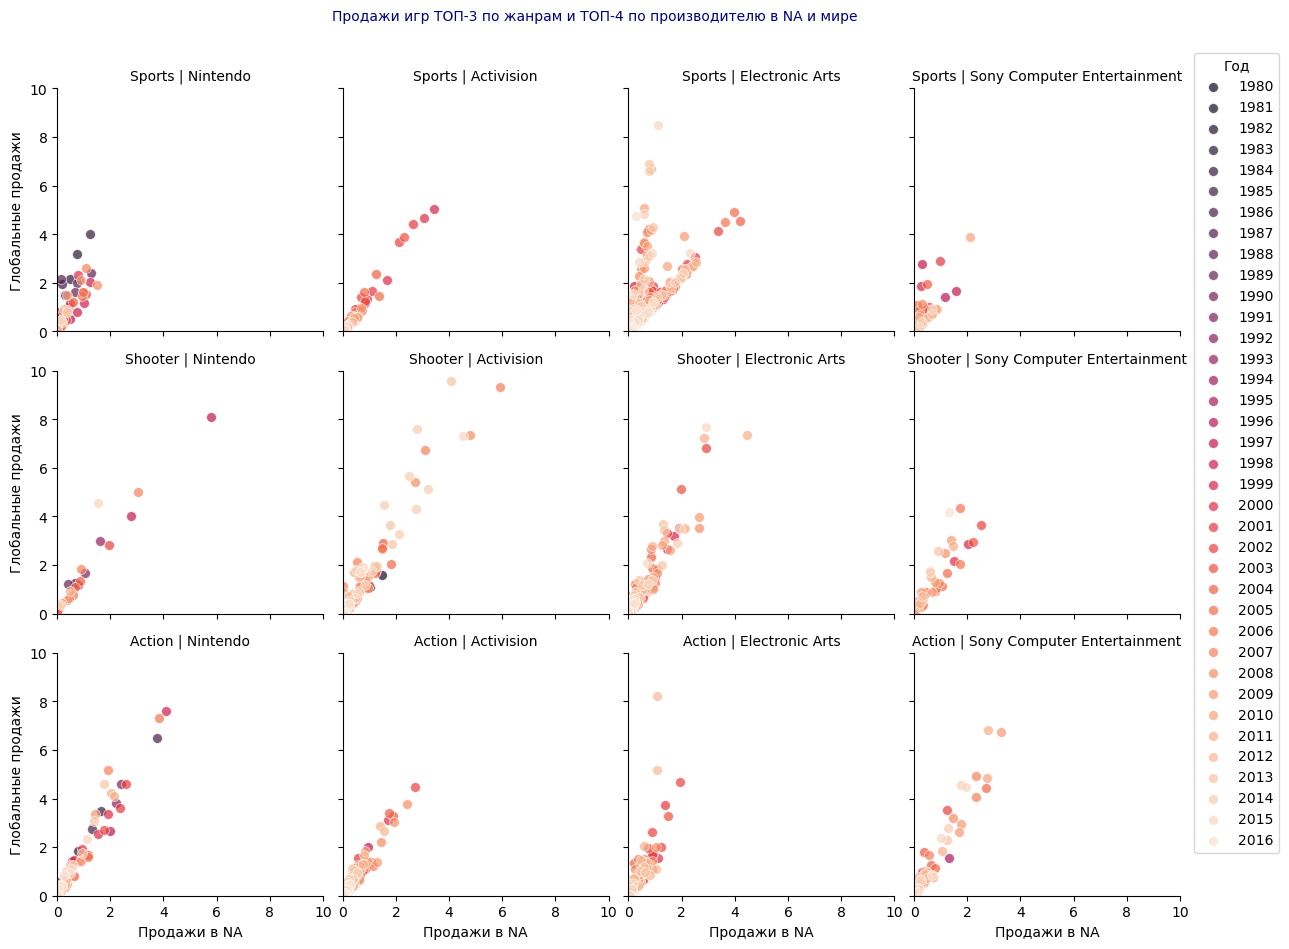

In [30]:

#получаем топ-3 жанра и топ-4 издателя
top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(3).index.tolist()
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(4).index.tolist()
#фильтруем исходные данные для топ-комбинаций
filtered_df = df[(df['Genre'].isin(top_genres)) & (df['Publisher'].isin(top_publishers))]

#удаляем строки с пропущенными годами
filtered_df = filtered_df.dropna(subset=['Year'])
#округляем год до целого
filtered_df['Year'] = filtered_df['Year'].astype(int)

#создаем FacetGrid
g = sns.FacetGrid(filtered_df, row='Genre', col='Publisher', hue='Year', palette='rocket', legend_out=False)

#добавляем scatterplot
g.map(sns.scatterplot, 'NA_Sales', 'Global_Sales', alpha=0.7, s=50)

#настройка внешнего вида
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_axis_labels('Продажи в NA', 'Глобальные продажи')
g.add_legend(bbox_to_anchor=(1.05, 1))
#устанавливаем одинаковые пределы для осей X и Y

#добавляем общий заголовок
g.fig.suptitle('Продажи игр ТОП-3 по жанрам и ТОП-4 по производителю в NA и мире', color='navy', fontsize=10, y=1.05)

#устанавливаем пределы осей X и Y до 10
g.set(xlim=(0, 10), ylim=(0, 10))
#добавляем легенду сбоку
g.add_legend(title='Год', bbox_to_anchor=(4.25, -0.5), loc='center left')


#plt.tight_layout()
plt.show()


In [91]:
filtered_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
...,...,...,...,...,...,...,...,...,...,...,...
16411,16414,Teenage Mutant Ninja Turtles (3DS),3DS,2013.0,Action,Activision,0.01,0.00,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16444,16447,Madagascar: Escape 2 Africa,PC,2008.0,Action,Activision,0.01,0.00,0.00,0.00,0.01
16501,16504,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010.0,Shooter,Activision,0.01,0.00,0.00,0.00,0.01
